# Disparate Impact Analysis (DIA) Explainer Demo

This example demonstrates how to interpret a **scikit-learn** model using
the H2O Sonar library and retrieve the data and plot the **Disparate Impact Analysis**.

In [1]:
import logging

import pandas
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons, explainers
from h2o_sonar.explainers.dia_explainer import DiaExplainer
from h2o_sonar.lib.api.models import ModelApi

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
results_location = "../../results"

# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"
df = pandas.read_csv(dataset_path)
(X, y) = df.drop(target_col, axis=1), df[target_col]

In [3]:
# parameters
interpret.describe_explainer(DiaExplainer)

{'id': 'h2o_sonar.explainers.dia_explainer.DiaExplainer',
 'name': 'DiaExplainer',
 'display_name': 'Disparate Impact Analysis',
 'description': 'Disparate Impact Analysis (DIA) is a technique that is used to evaluate fairness. Bias can be introduced to models during the process of collecting, processing, and labeling data as a result, it is important to determine whether a model is harming certain users by making a significant number of biased decisions. DIA typically works by comparing aggregate measurements of unprivileged groups to a privileged group. For instance, the proportion of the unprivileged group that receives the potentially harmful outcome is divided by the proportion of the privileged group that receives the same outcome - the resulting proportion is then used to determine whether the model is biased.',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial'],
 'explanation_scopes': ['global_scope'],
 'explanations': [{'explanation_type': 'glob

## Interpret

/home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Preparing and checking DIA features (None): dataset=     | BILL_AMT5  LIMIT_BAL  default payment next month  PAY_5     ID  BILL_AMT6    AGE  BILL_AMT1  PAY_0  PAY_AMT2  …  BILL_AMT3  PAY_AMT5    SEX  PAY_6  PAY_2
     |     int64      int64                       int64  int64  int64      int64  int64      int64  int64     int64         int64     int64  int64  int64  int64
---- + ---------  ---------  --------------------------  -----  -----  ---------  -----  ---------  -----  --------     ---------  --------  -----  -----  -----
   0 |         0      20000                           1     -2      1          0     24       3913     -2       689  …        689         0      2     -2      2
   1 |      3455     120000                           1      0      2       3261     26       2682     -1      1000  …       2682         0      2      2      2
   2 |     14948      90000                           0      0      3      15549     34      29239      0      1500  …      13559      1000    

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

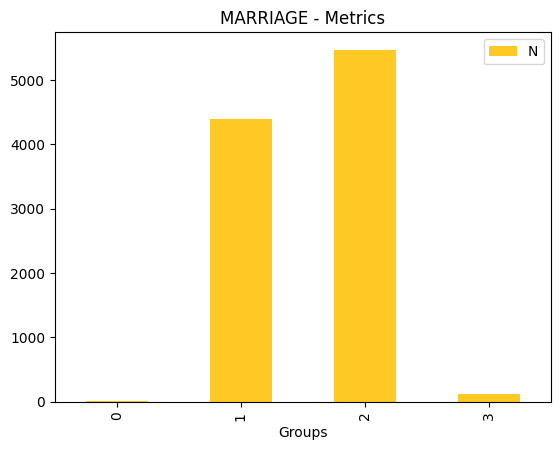

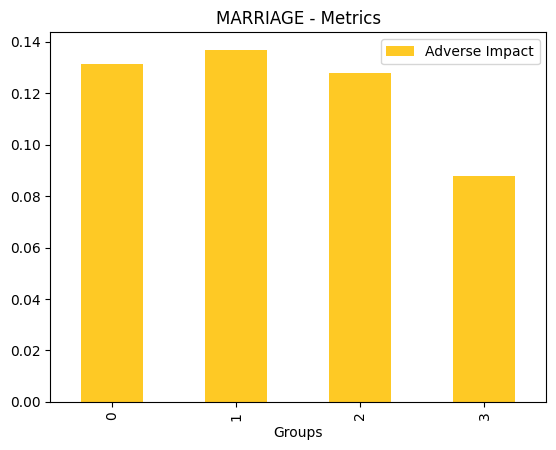

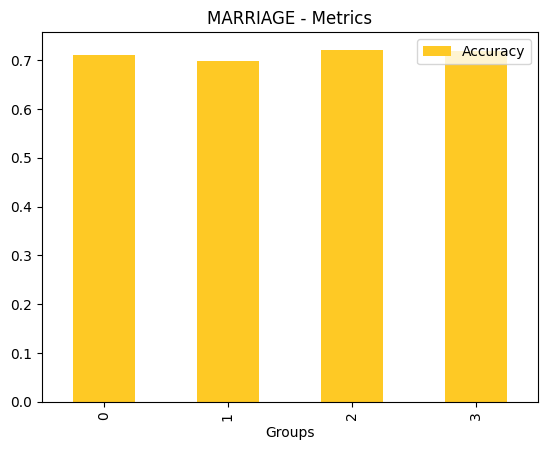

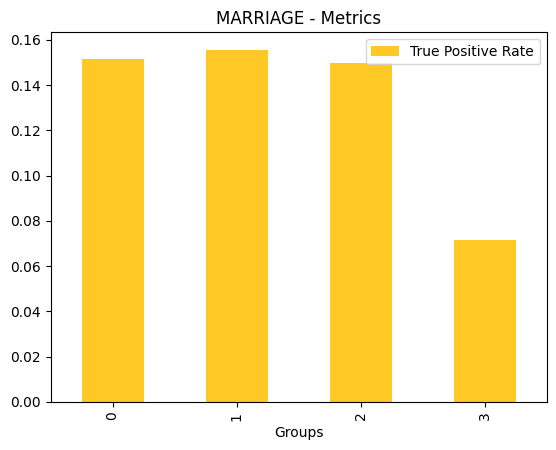

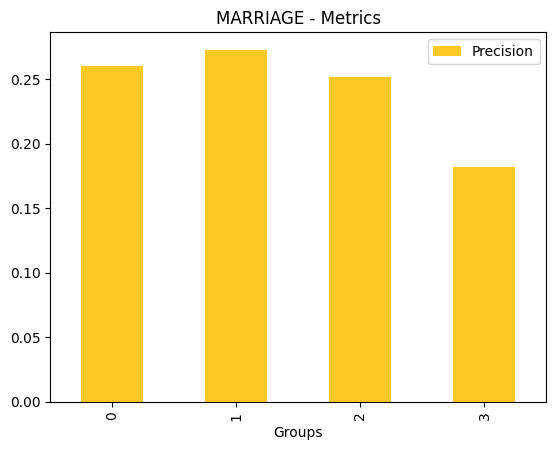

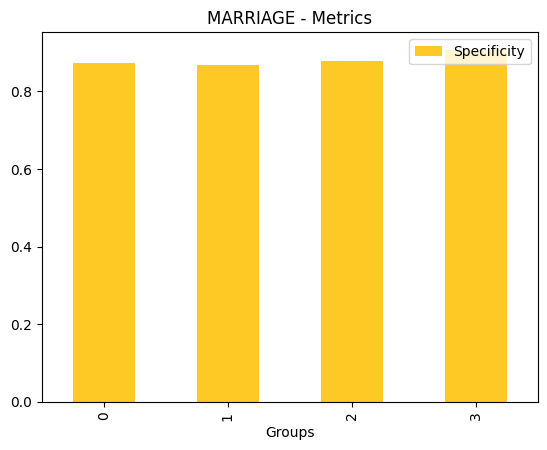

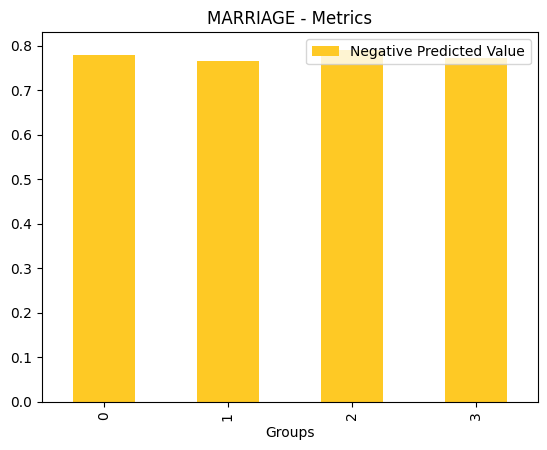

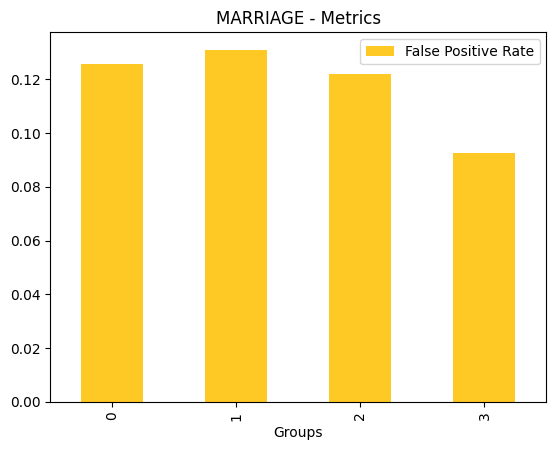

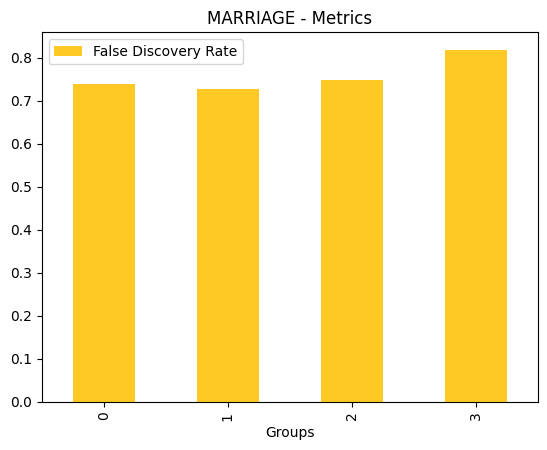

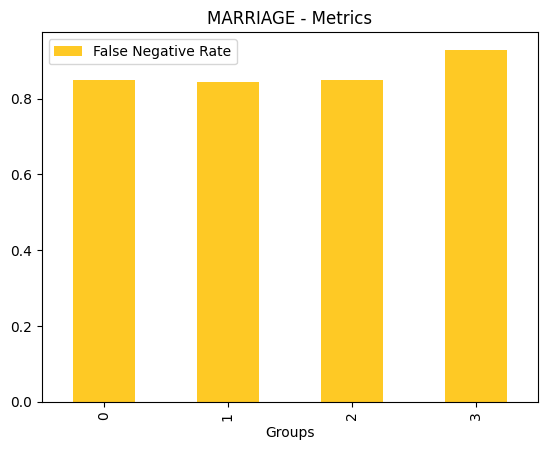

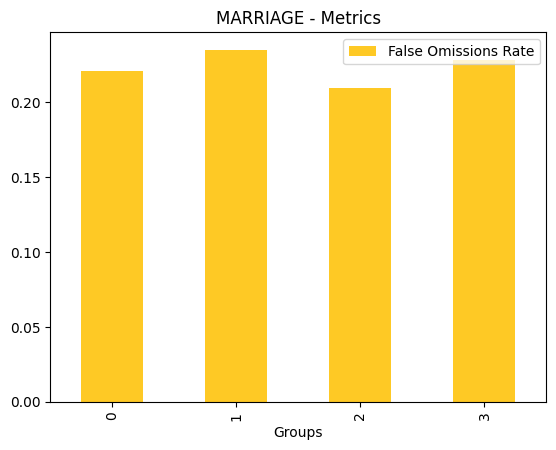

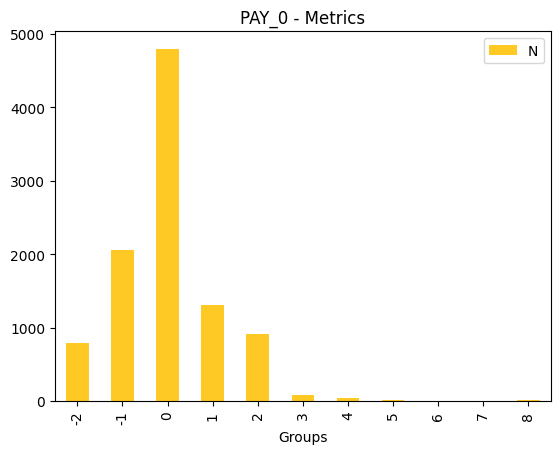

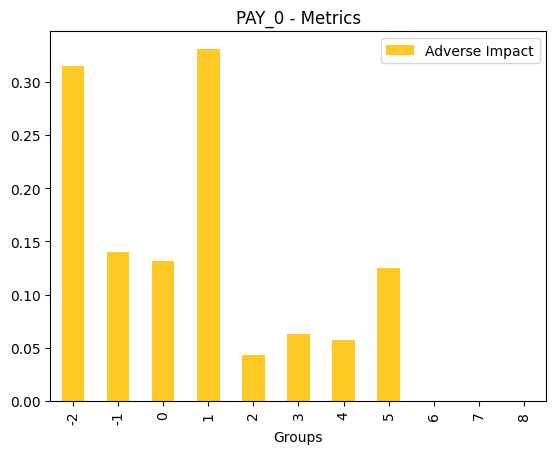

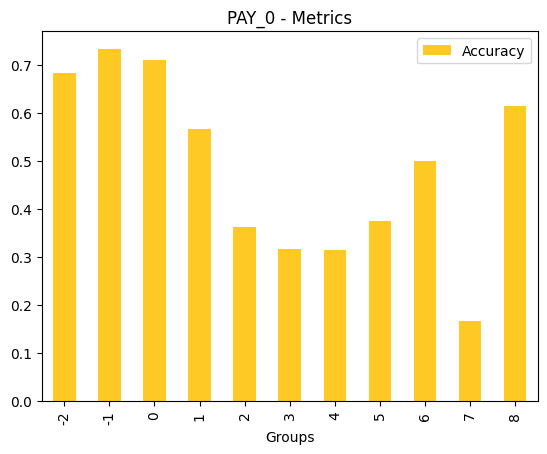

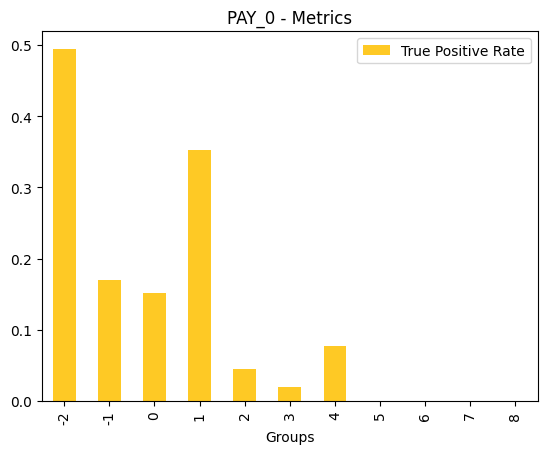

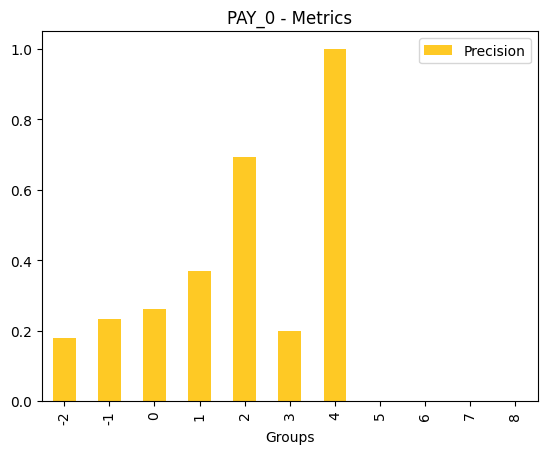

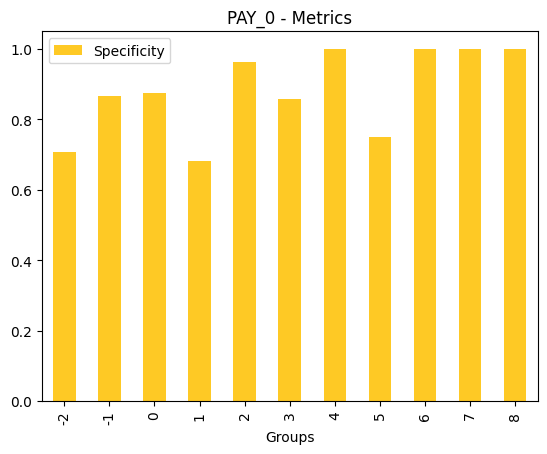

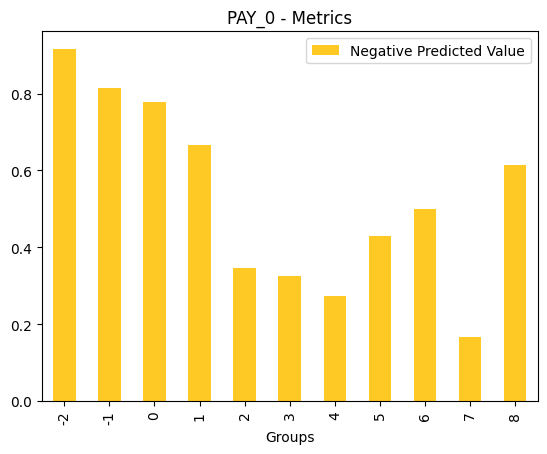

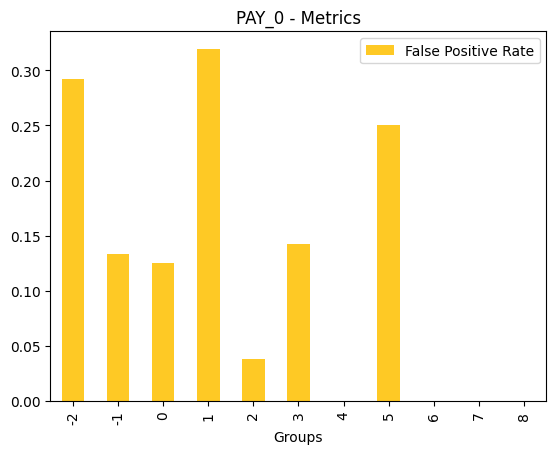

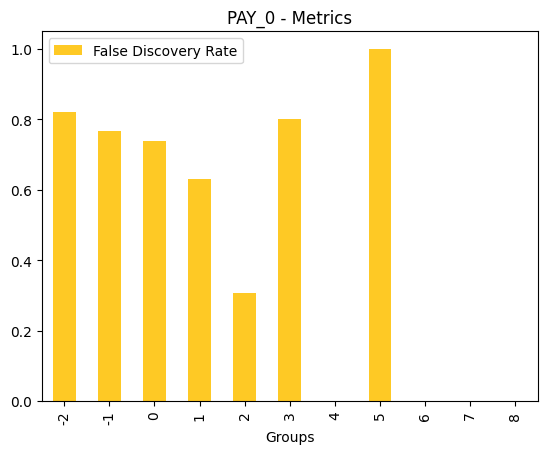

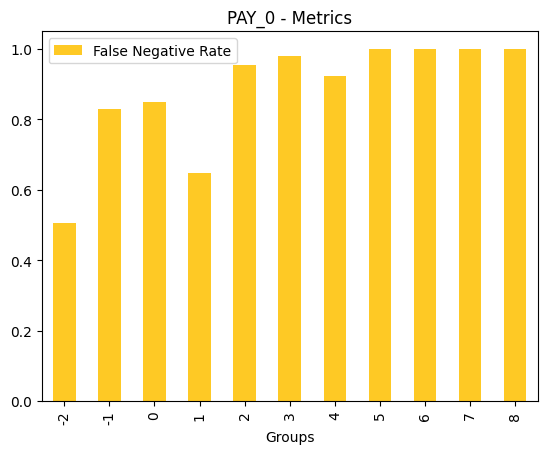

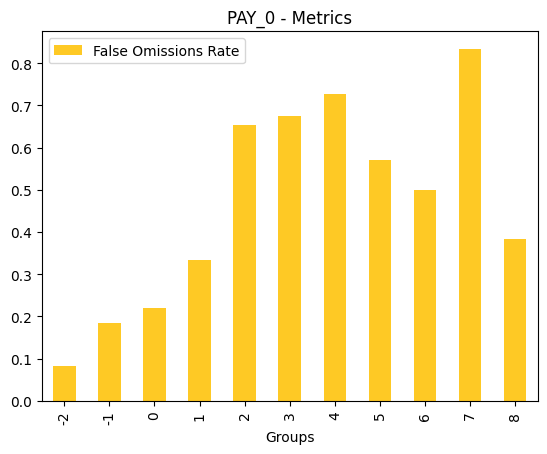

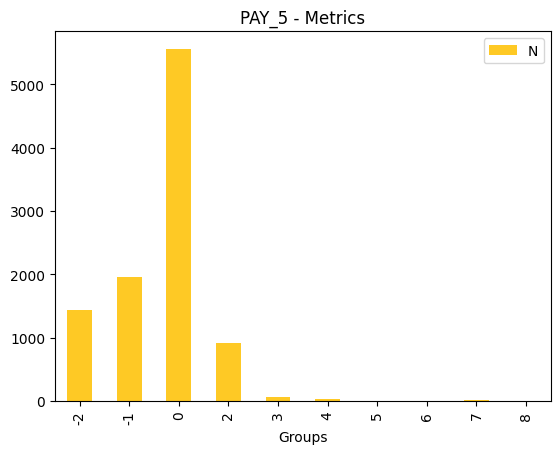

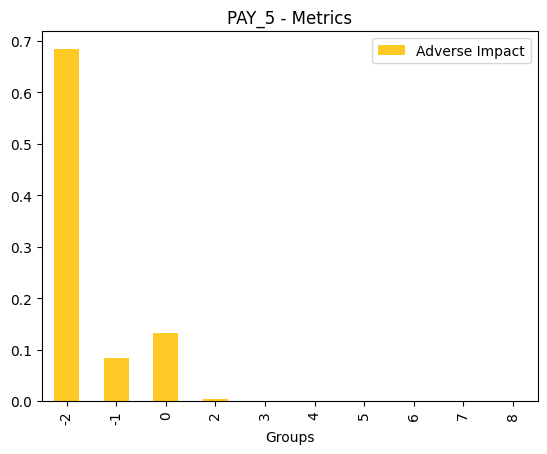

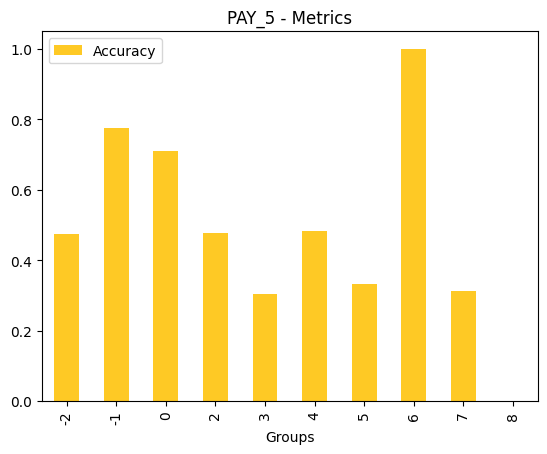

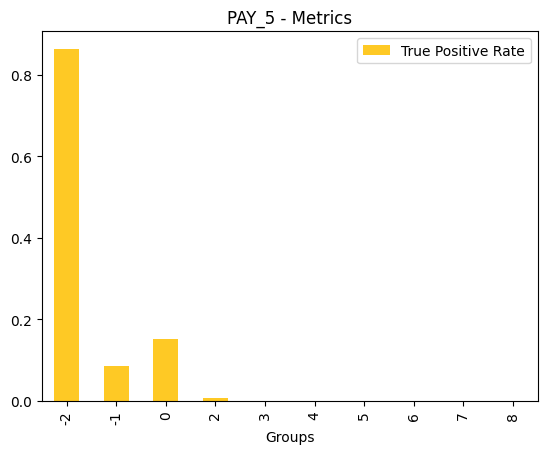

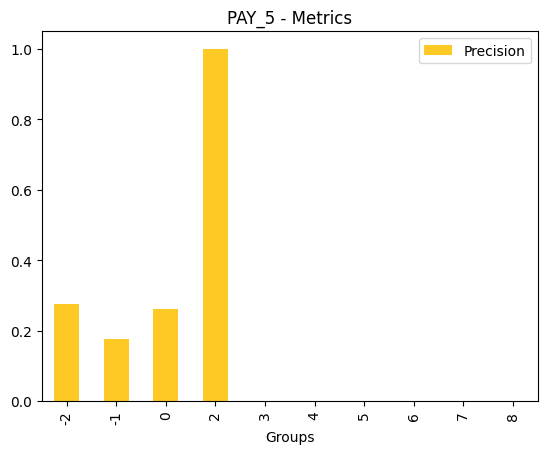

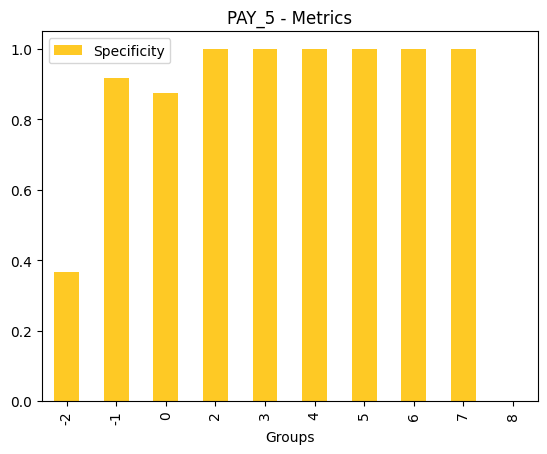

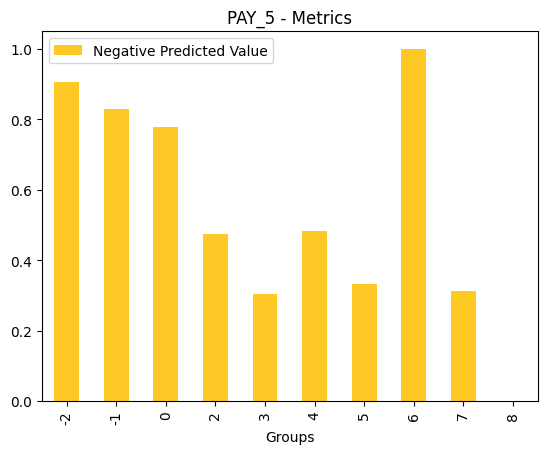

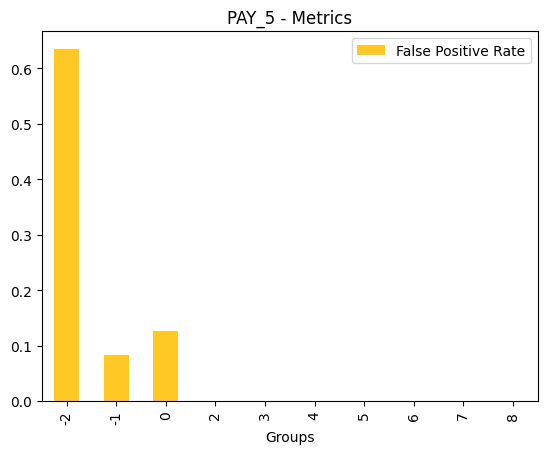

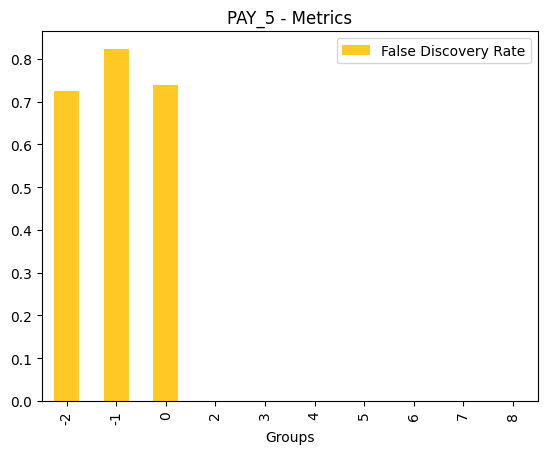

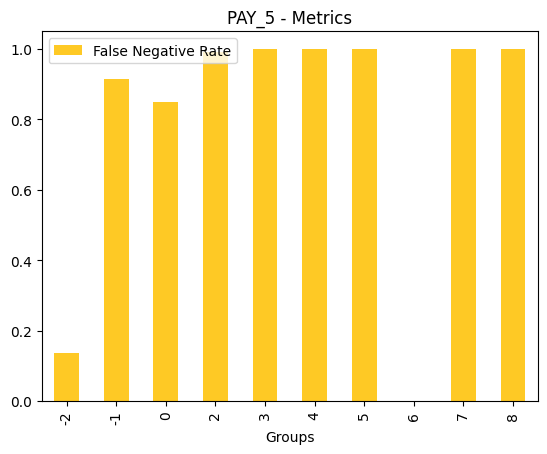

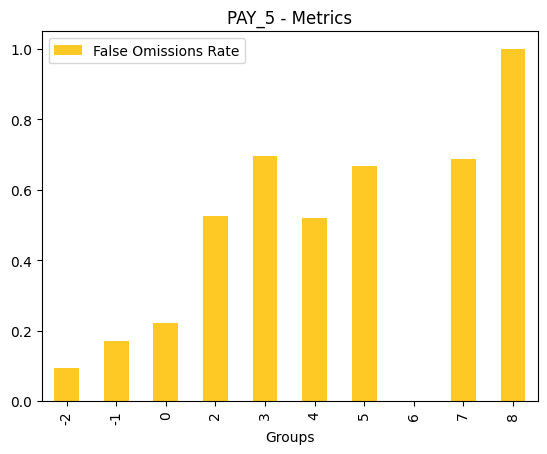

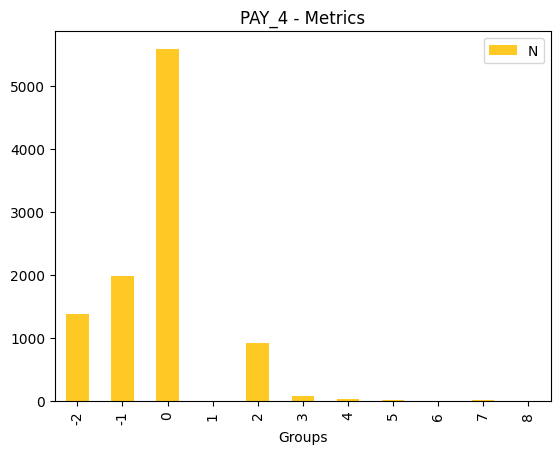

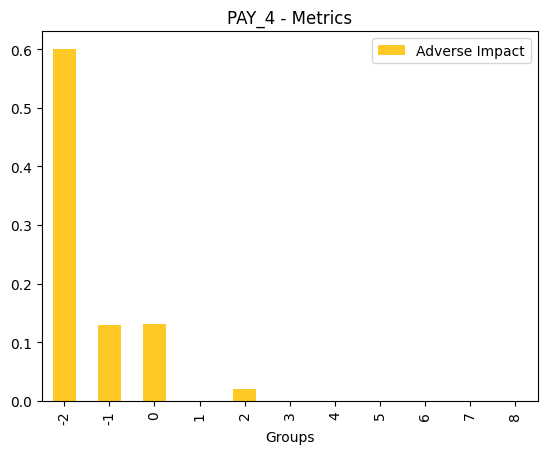

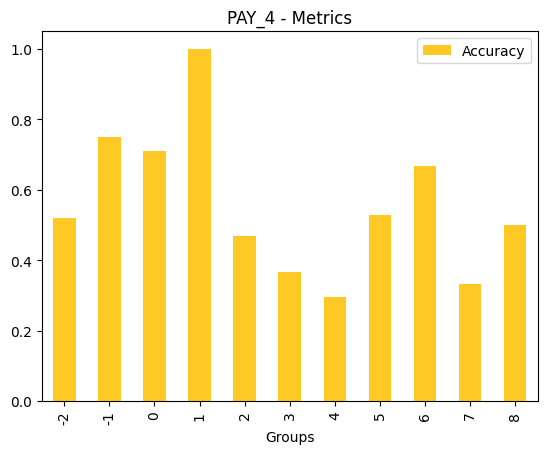

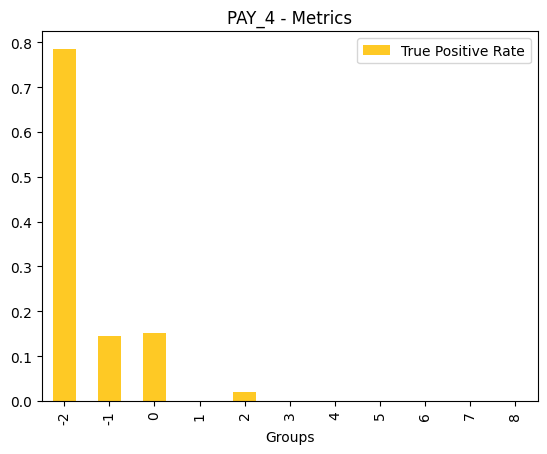

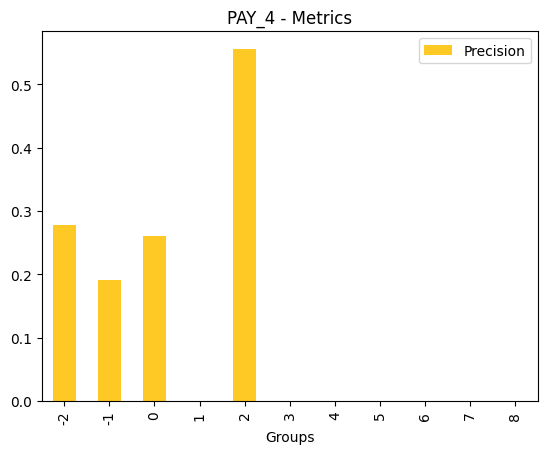

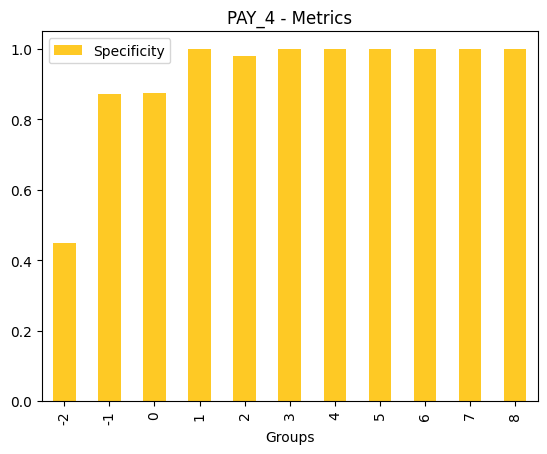

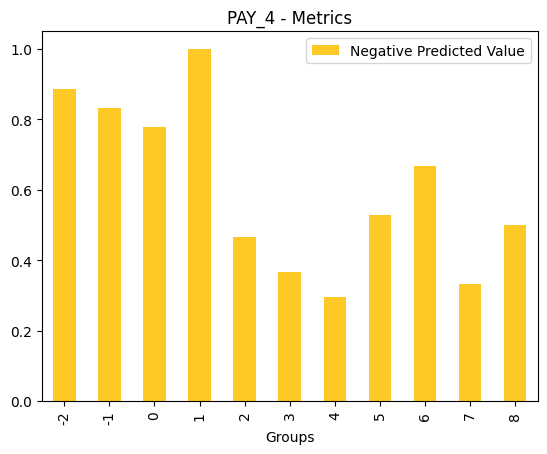

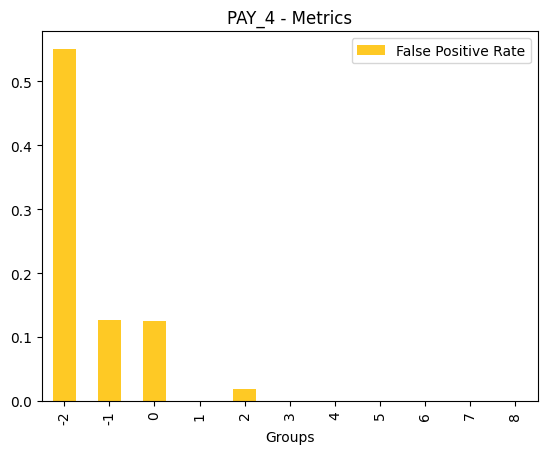

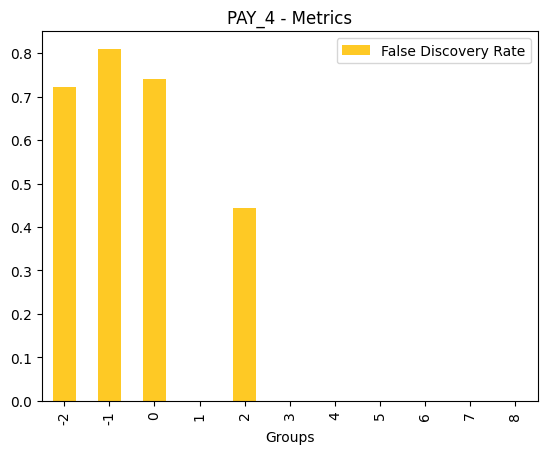

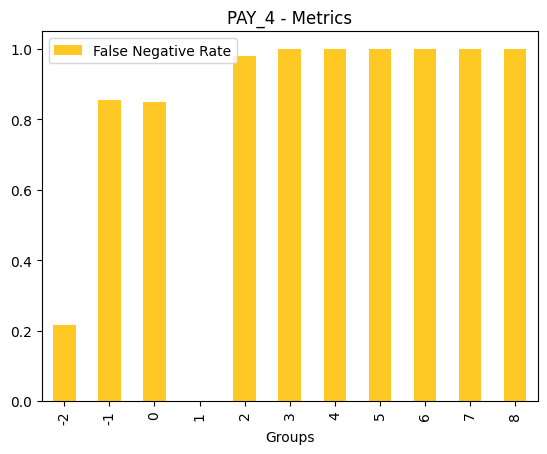

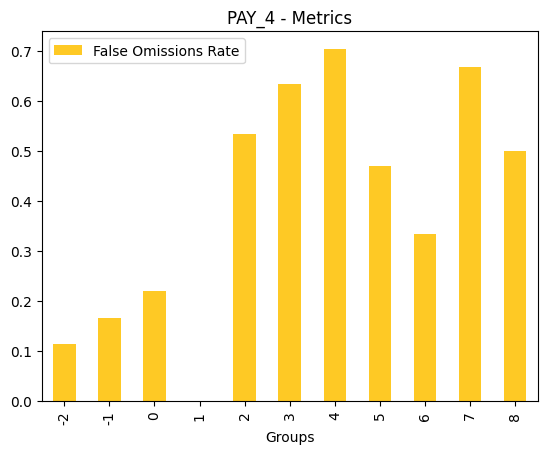

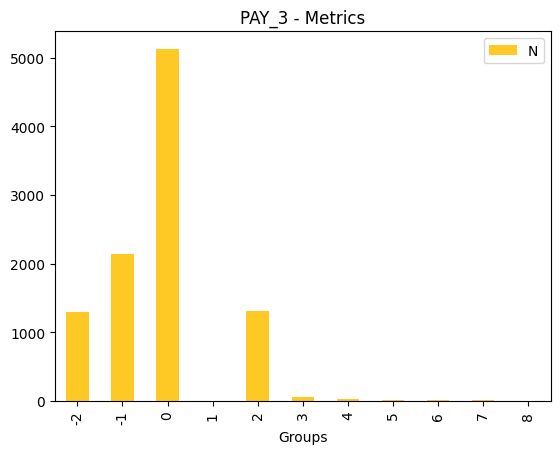

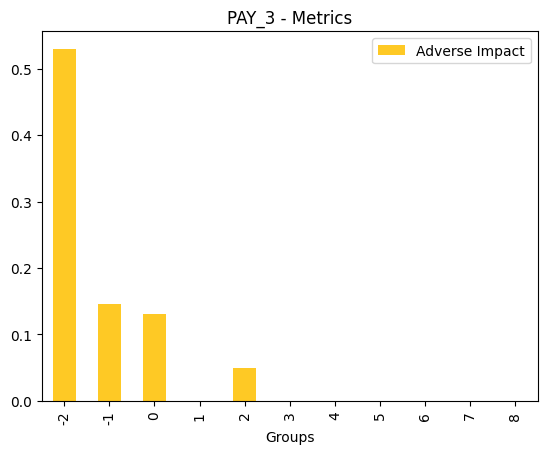

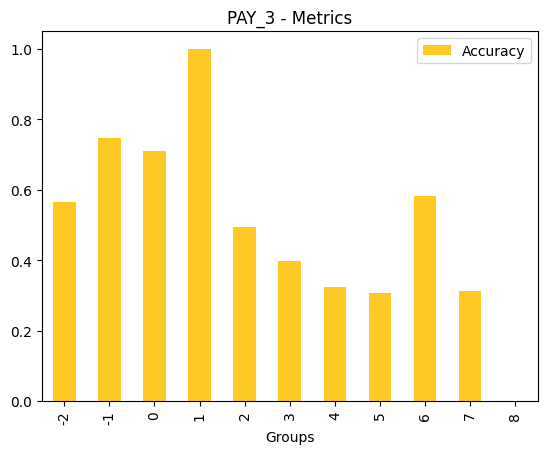

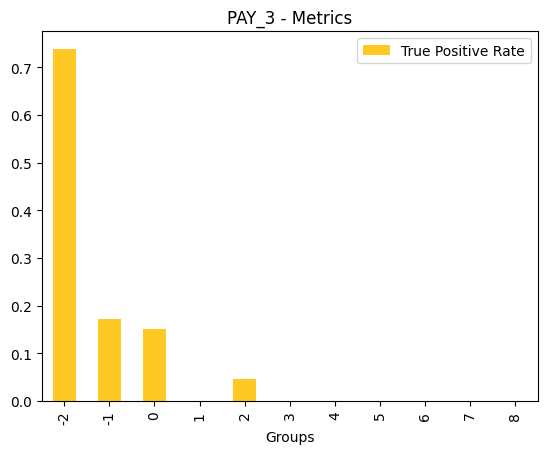

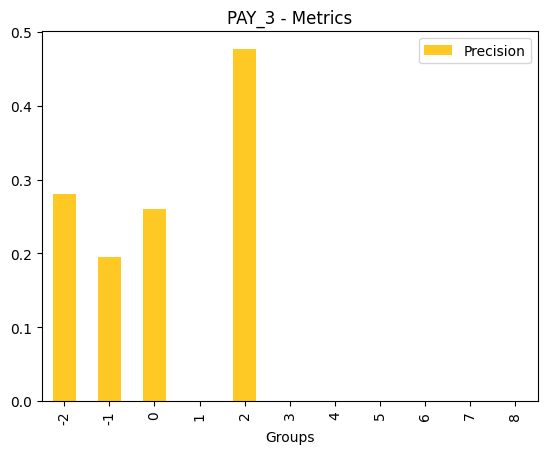

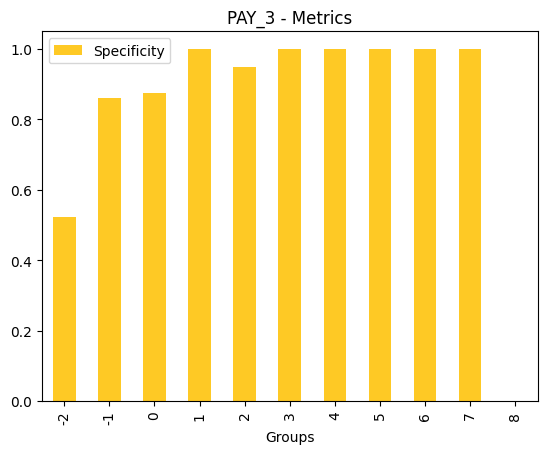

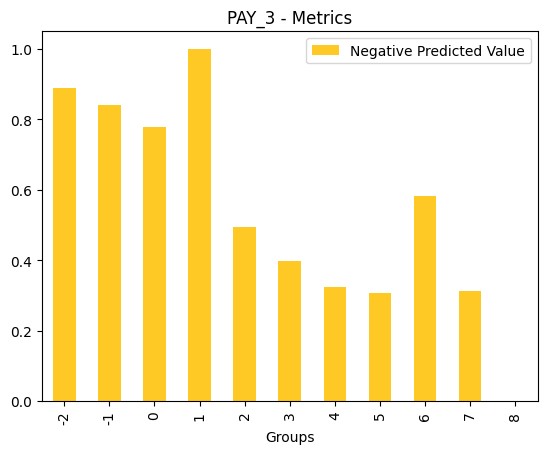

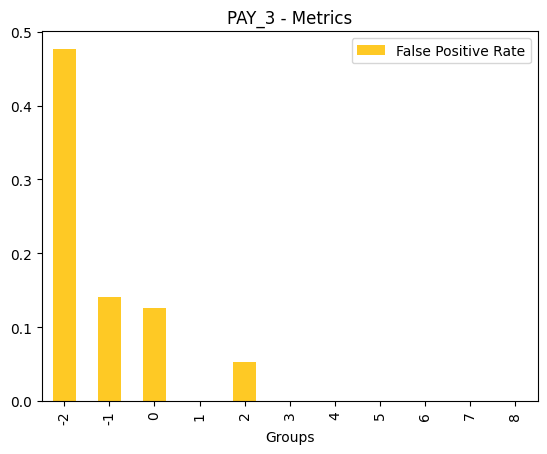

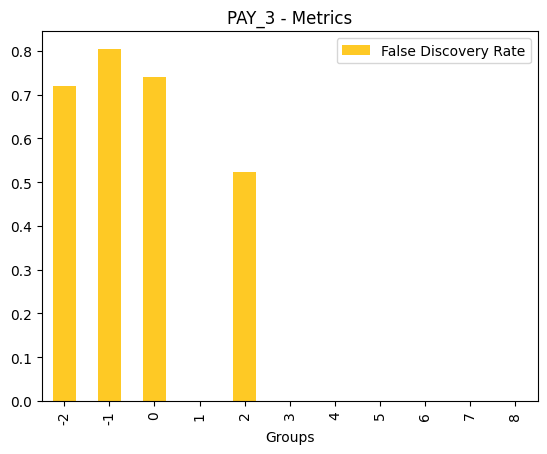

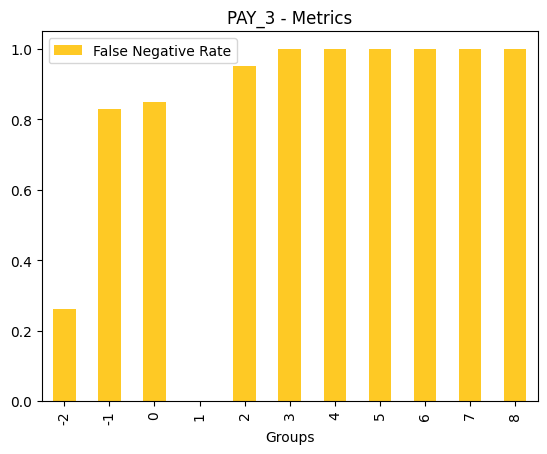

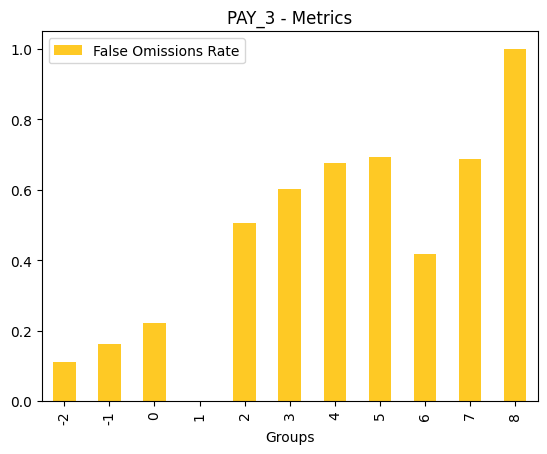

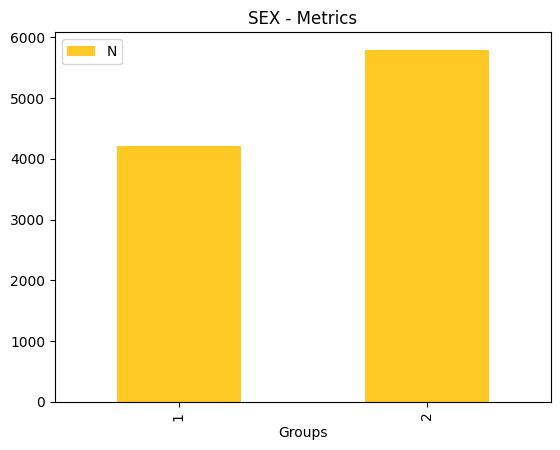

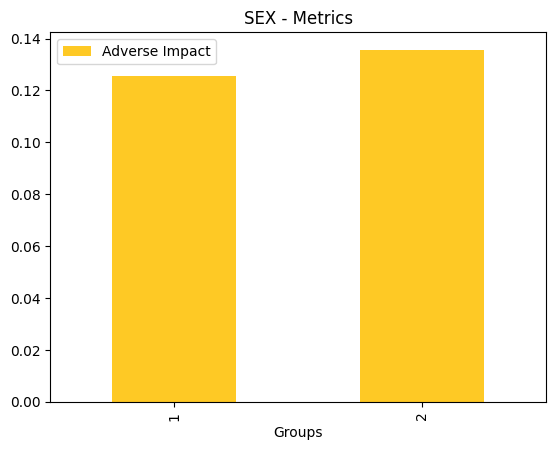

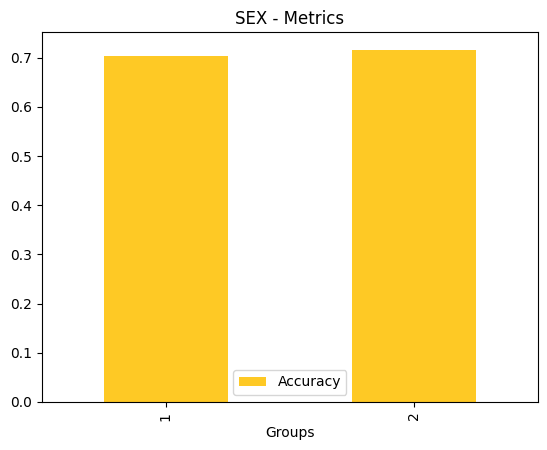

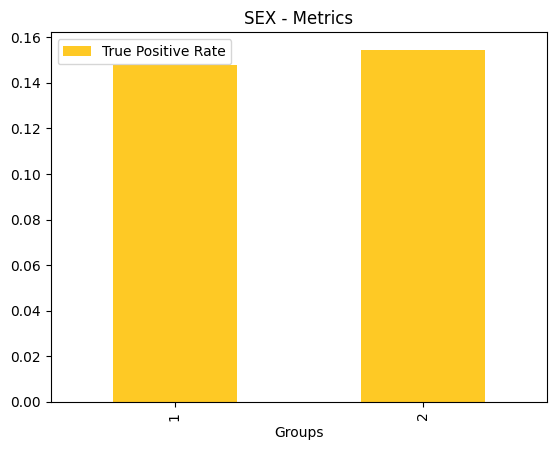

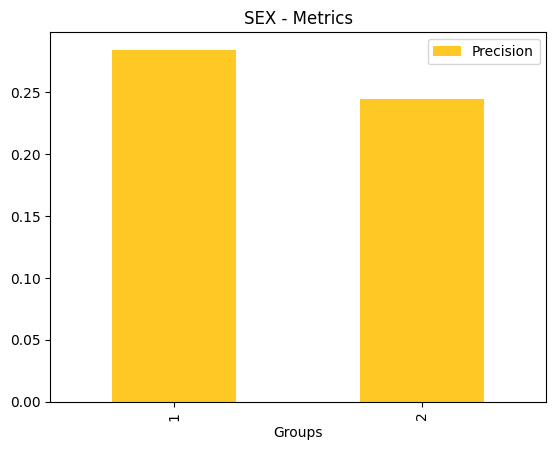

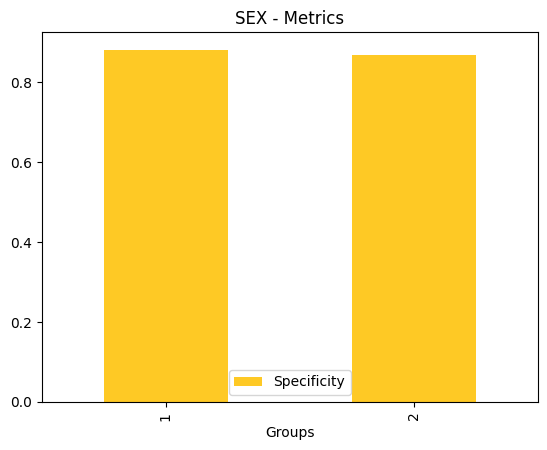

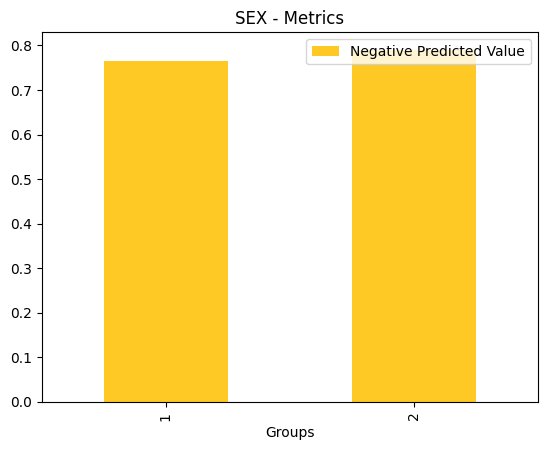

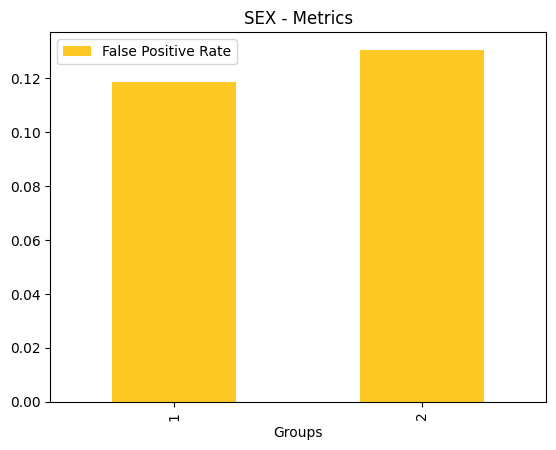

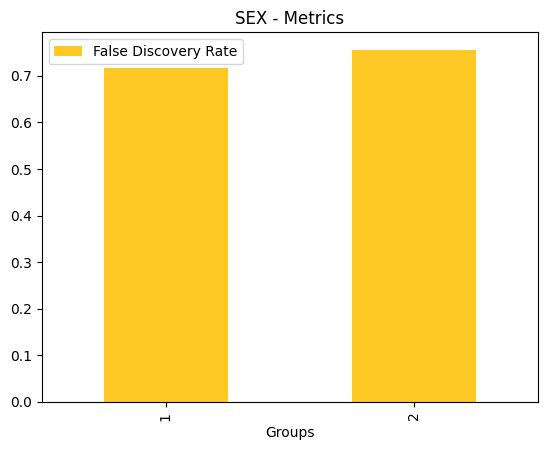

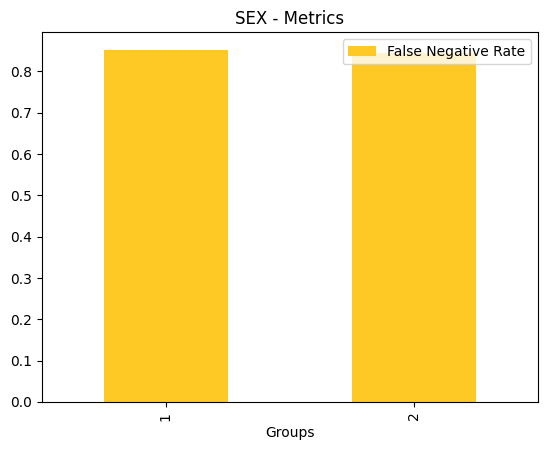

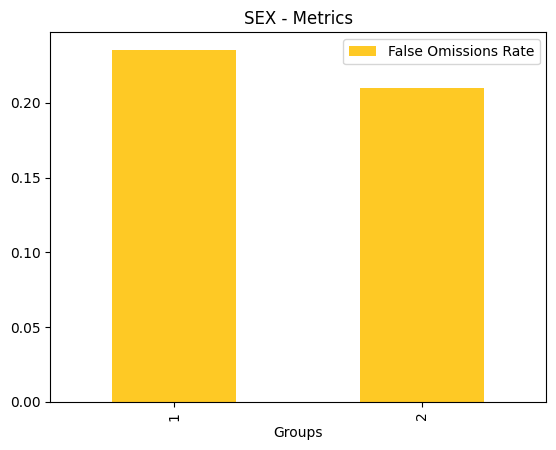

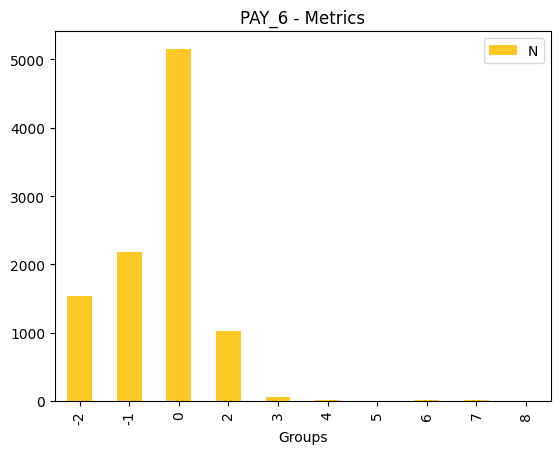

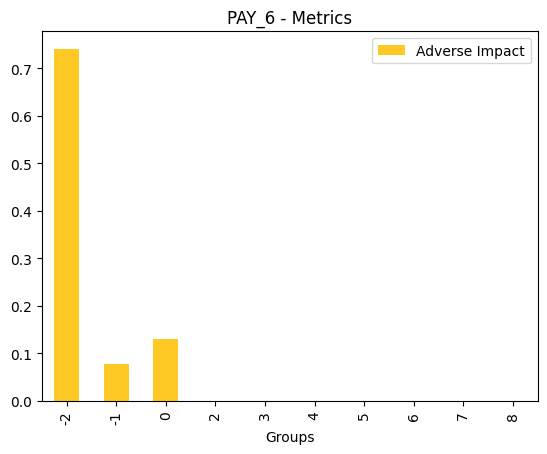

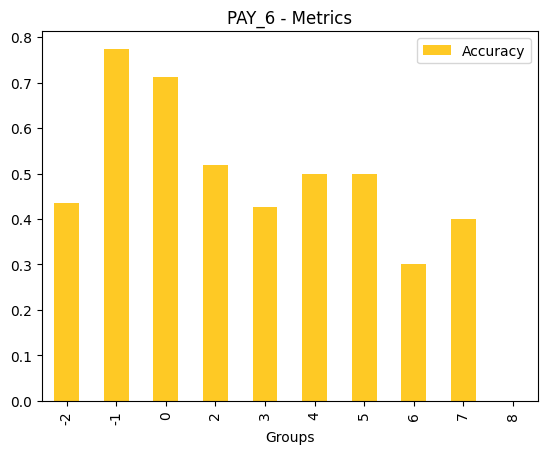

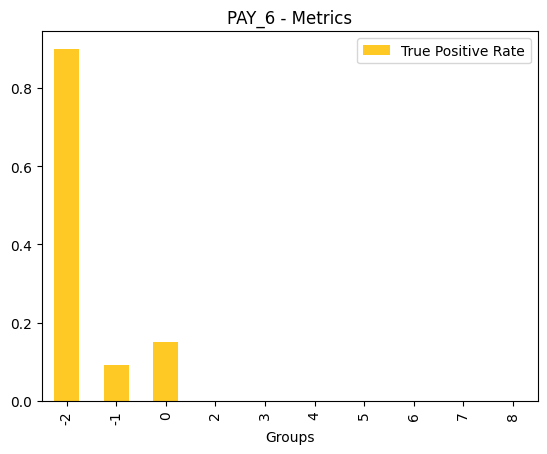

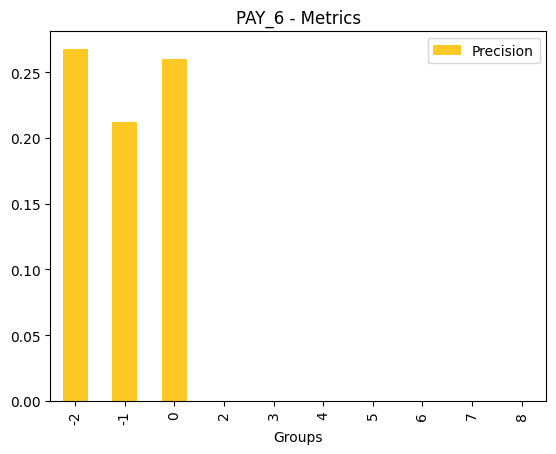

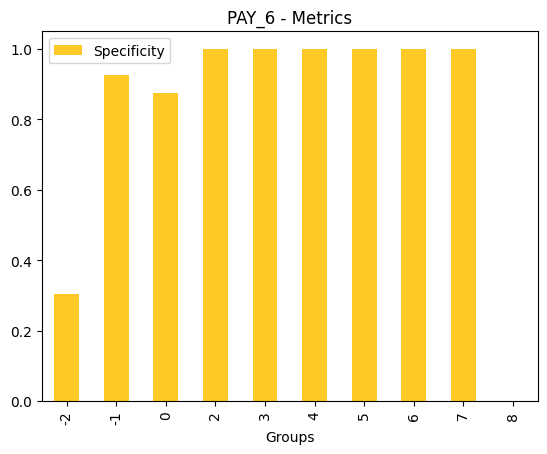

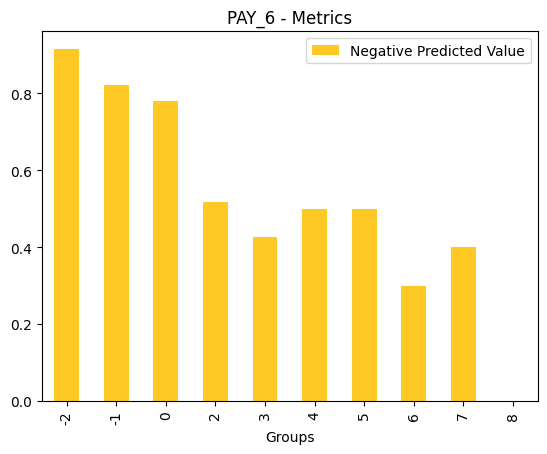

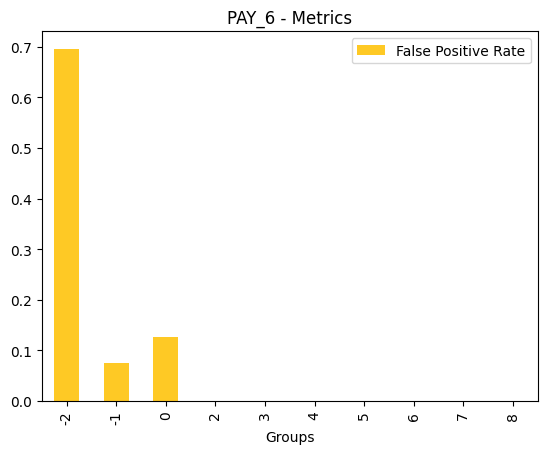

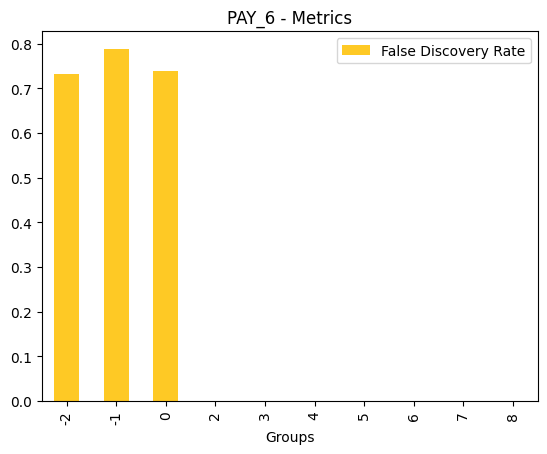

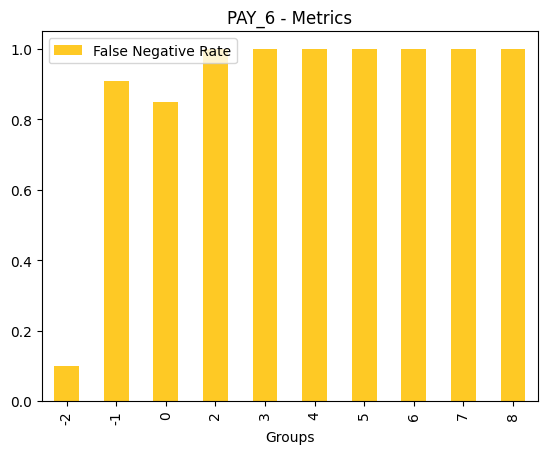

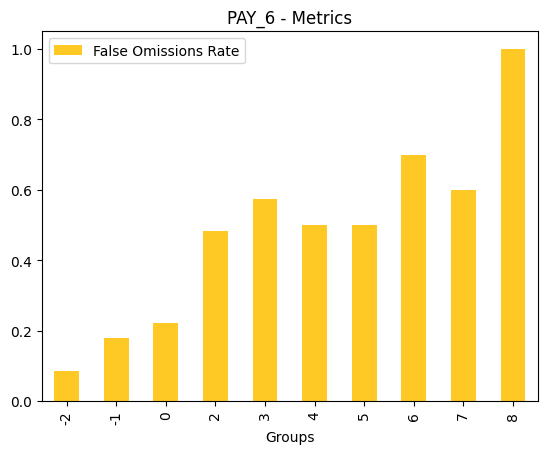

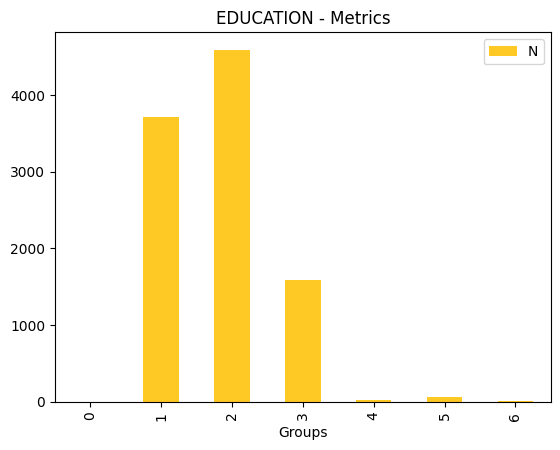

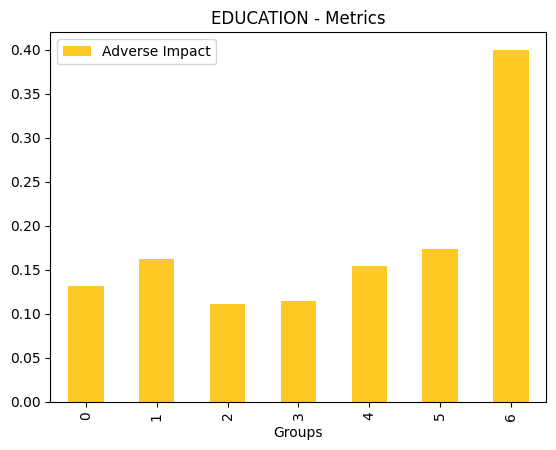

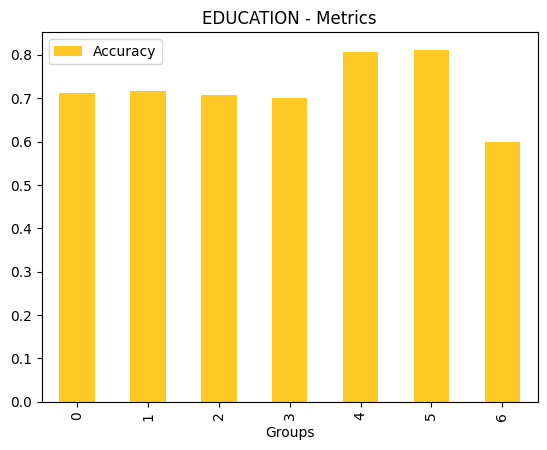

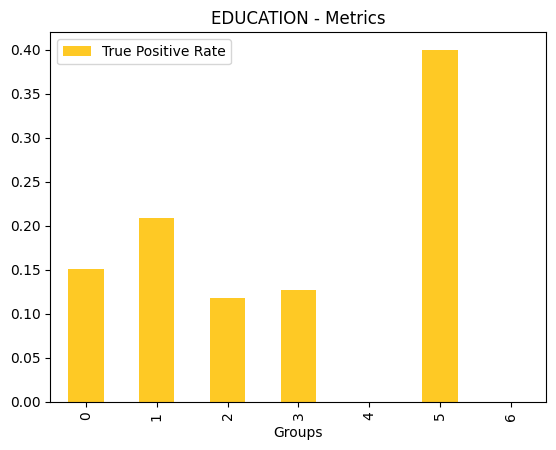

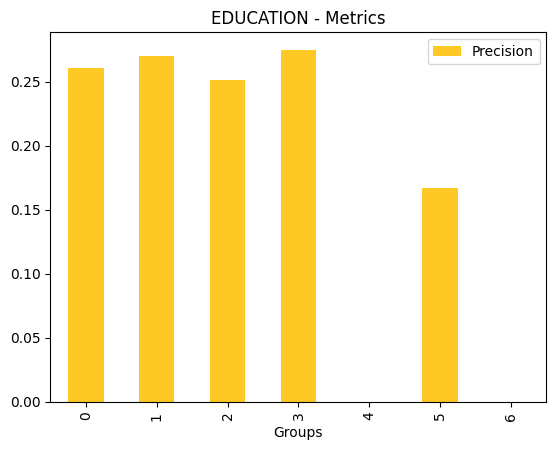

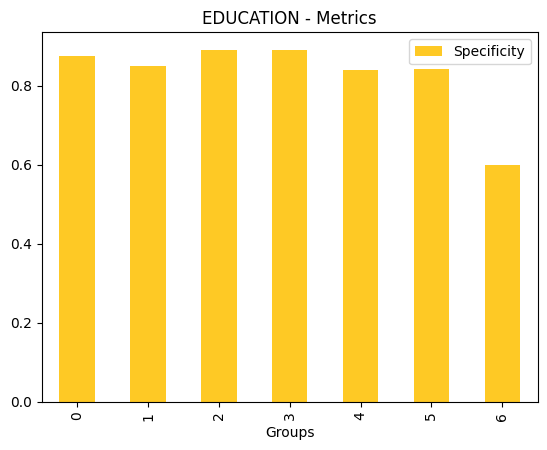

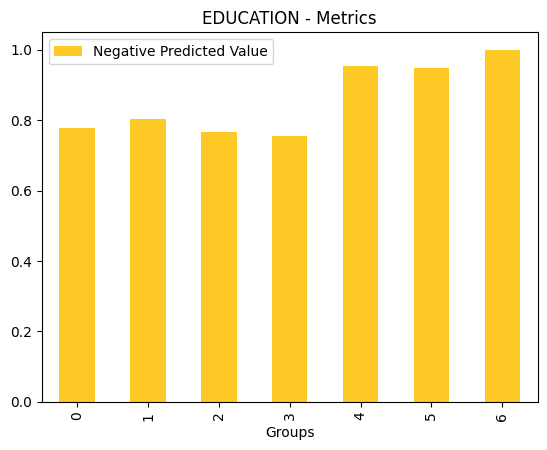

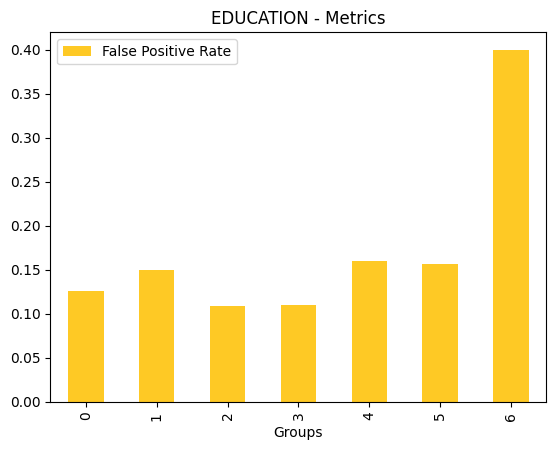

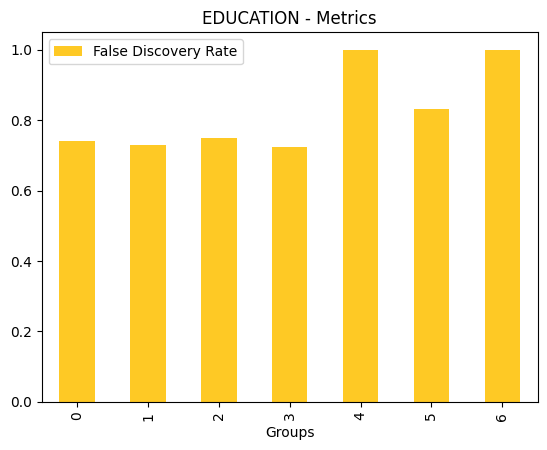

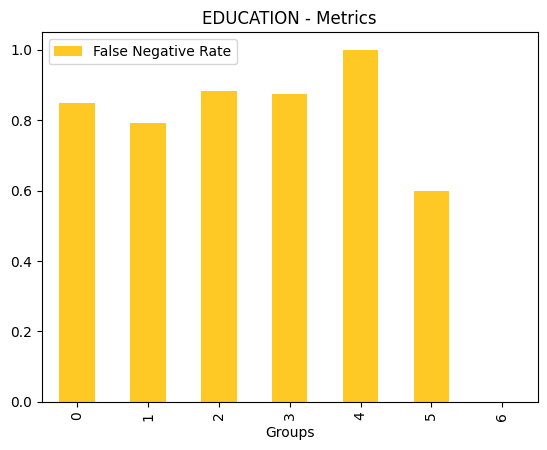

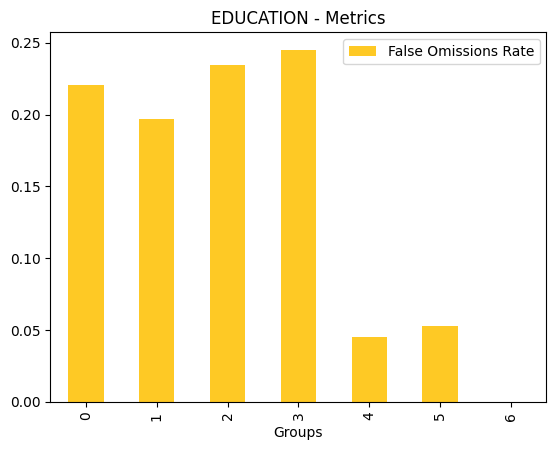

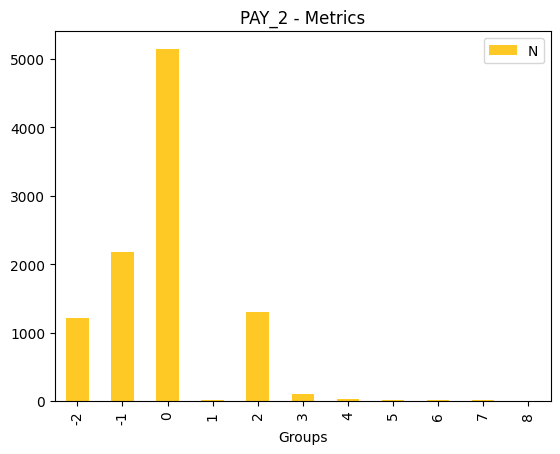

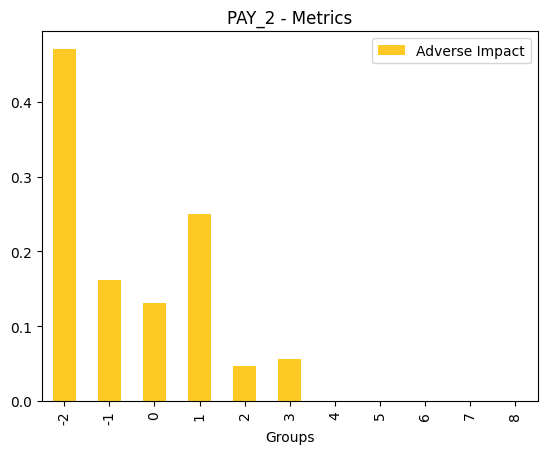

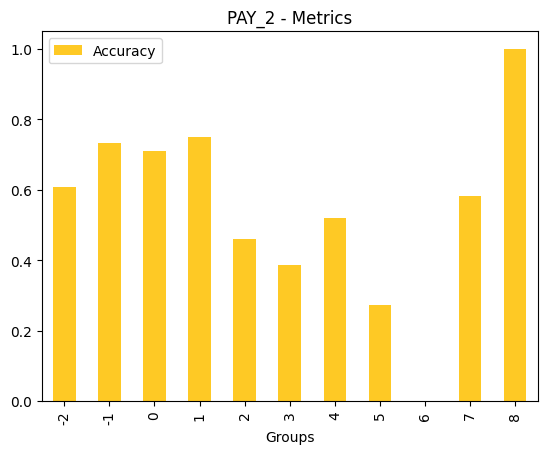

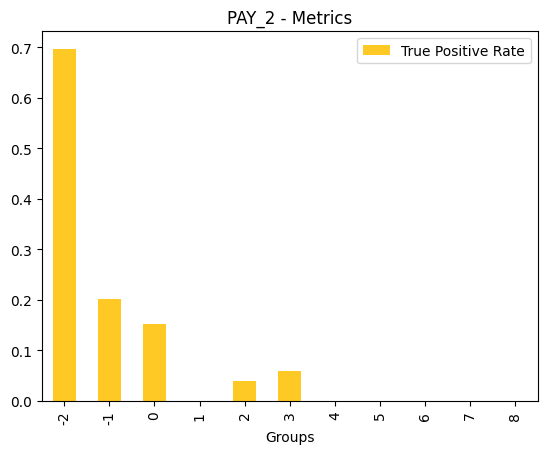

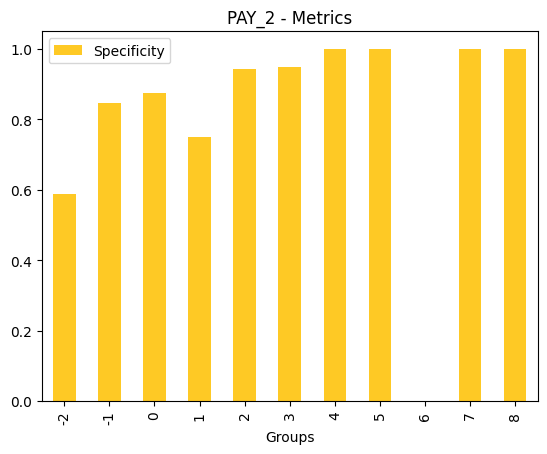

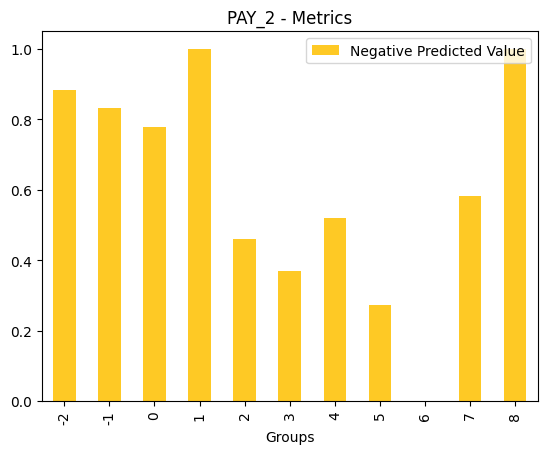

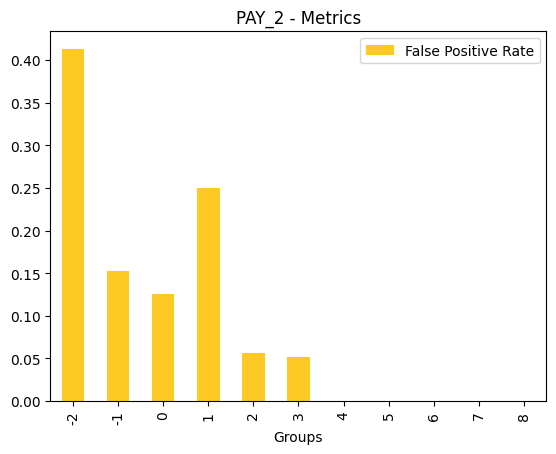

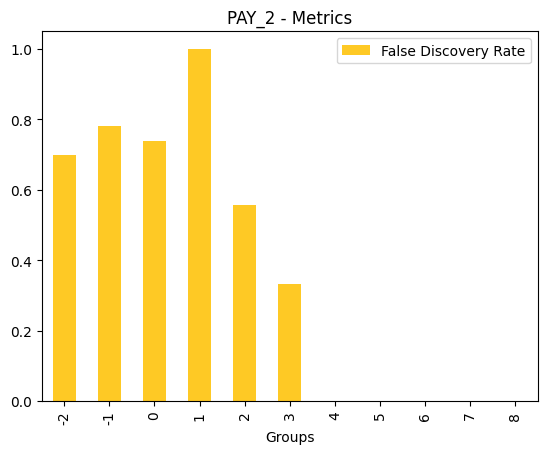

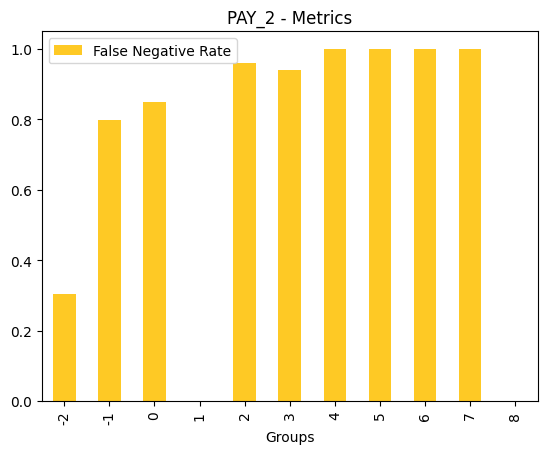

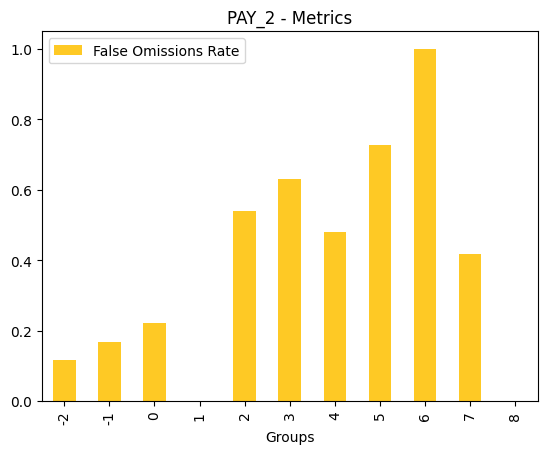

In [4]:
# scikit-learn model
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X, y)

# explainable model
model = ModelApi().create_model(target_col=target_col, model_src=gradient_booster, used_features=X.columns.to_list())

interpretation = interpret.run_interpretation(
    dataset=df,
    model=model,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
    explainers=[
        commons.ExplainerToRun(
            explainer_id=DiaExplainer.explainer_id(),
            params="",
        )
    ]
)

## Interact with the Explainer Result

In [5]:
# retrieve the result
result = interpretation.get_explainer_result(DiaExplainer.explainer_id())

In [6]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [7]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.dia_explainer.DiaExplainer',
 'name': 'DiaExplainer',
 'display_name': 'Disparate Impact Analysis',
 'description': 'Disparate Impact Analysis (DIA) is a technique that is used to evaluate fairness. Bias can be introduced to models during the process of collecting, processing, and labeling data as a result, it is important to determine whether a model is harming certain users by making a significant number of biased decisions. DIA typically works by comparing aggregate measurements of unprivileged groups to a privileged group. For instance, the proportion of the unprivileged group that receives the potentially harmful outcome is divided by the proportion of the privileged group that receives the same outcome - the resulting proportion is then used to determine whether the model is biased.',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial'],
 'explanation_scopes': ['global_scope'],
 'explanations': [{'explanation_type': 'glob

In [8]:
# parameters
result.params()

{'dia_cols': ['MARRIAGE',
  'PAY_0',
  'PAY_5',
  'PAY_4',
  'PAY_3',
  'SEX',
  'PAY_6',
  'EDUCATION',
  'PAY_2'],
 'cut_off': 0.0,
 'maximize_metric': 'F1',
 'max_cardinality': 10,
 'min_cardinality': 2,
 'num_card': 25}

### Display the DIA data

In [9]:
# Print method help
import pprint
pprint.pprint(result.help())

{'methods': {'data': {'doc': '',
                      'parameters': [{'default': '',
                                      'doc': 'The name of the feature whose '
                                             'data we want to retrieve.',
                                      'name': 'feature_name',
                                      'required': True,
                                      'type': 'str'},
                                     {'default': '',
                                      'doc': 'The category of data to be '
                                             'retrieve. This can be one of the '
                                             "following: 'metrics', 'cm', "
                                             "'me_smd', 'disparity' and "
                                             "'parity'",
                                      'name': 'category',
                                      'required': True,
                                      'type': 'str'},
      

In [10]:
result.data(feature_name="MARRIAGE", category=result.DiaCategory.DIA_METRICS)

<Frame#7f1ddc0bcc60 4x12>

In [11]:
result.data(feature_name="EDUCATION", category=result.DiaCategory.DIA_CATEGORY_DISPARITY, ref_level="3")

<Frame#7f1d702ccae0 7x14>

In [12]:
result.data(feature_name="PAY_4", category=result.DiaCategory.DIA_CATEGORY_CM, ref_level=-1)

<Frame#7f1ddc04aea0 2x2>

In [13]:
result.data(feature_name="SEX", category=result.DiaCategory.DIA_CATEGORY_ME_SMD)

<Frame#7f1ddc0b10c0 2x4>

In [14]:
result.data(feature_name="PAY_2", category=result.DiaCategory.DIA_CATEGORY_PARITY)

<Frame#7f1ddc04af30 12x17>

In [15]:
result.data(feature_name="MARRIAGE", category=result.DiaCategory.DIA_CATEGORY_DISPARITY)

<Frame#7f1d702cca80 4x14>

### Plot the DIA Metrics

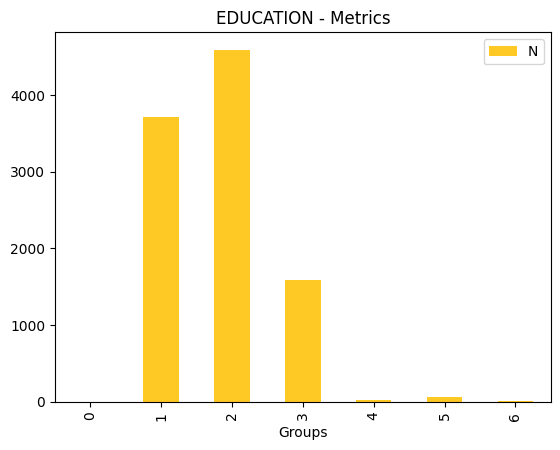

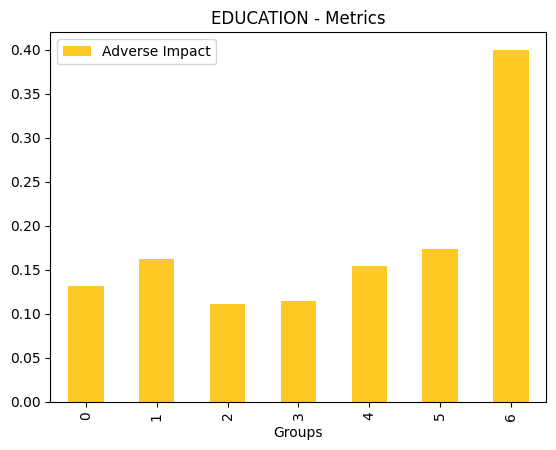

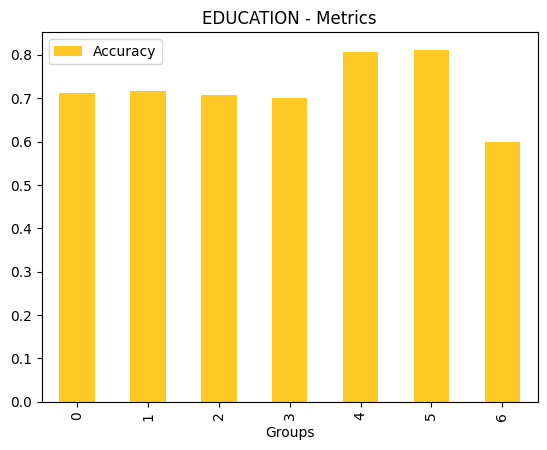

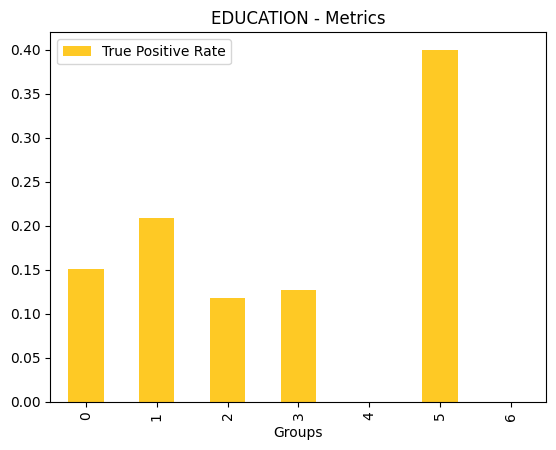

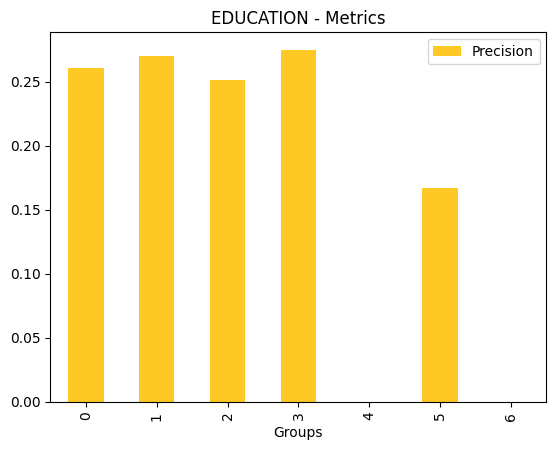

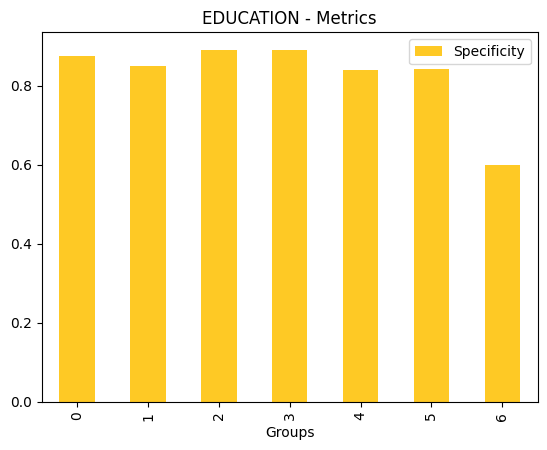

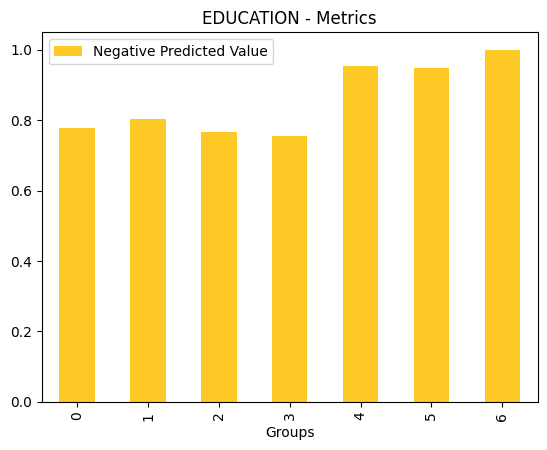

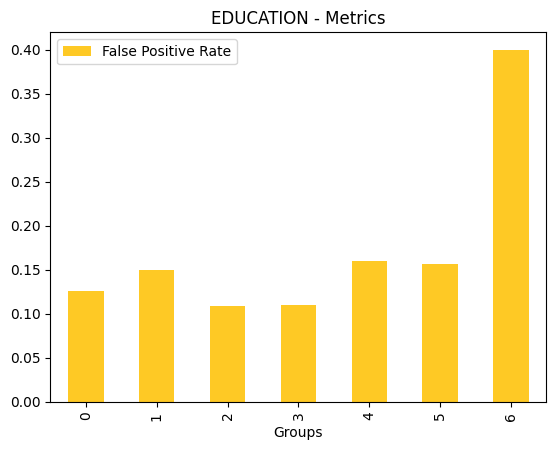

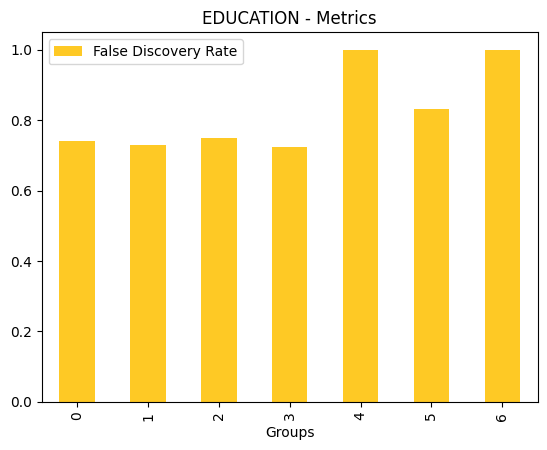

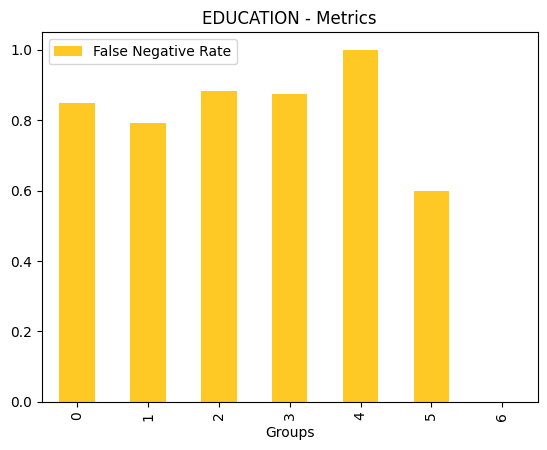

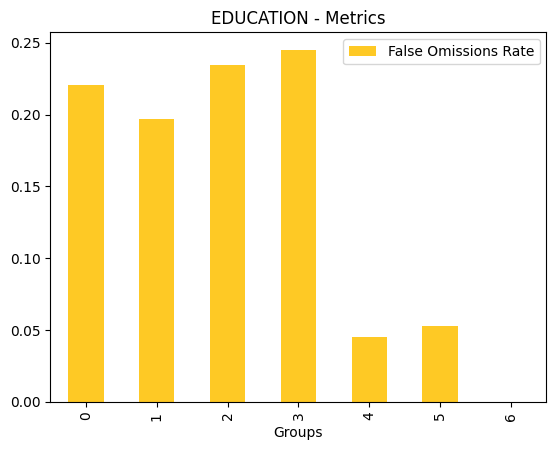

[]

In [16]:
result.plot(feature_name="EDUCATION")

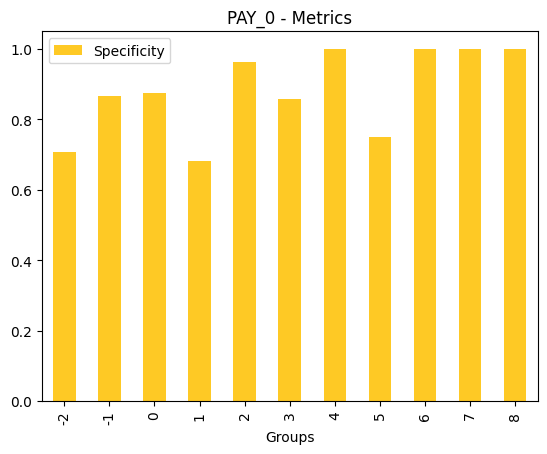

[]

In [17]:
# Only plot metric for "Specificity"
result.plot(feature_name="PAY_0", metrics_of_interest="Specificity")

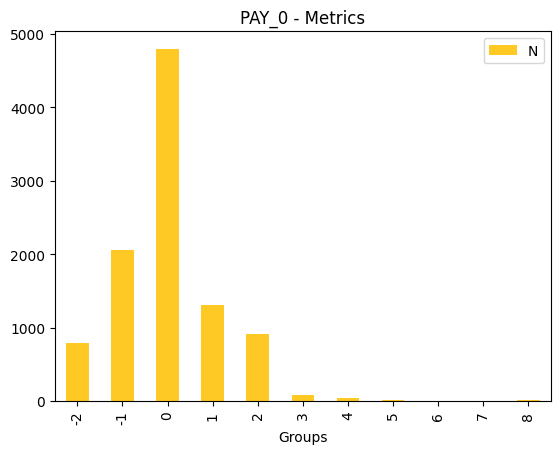

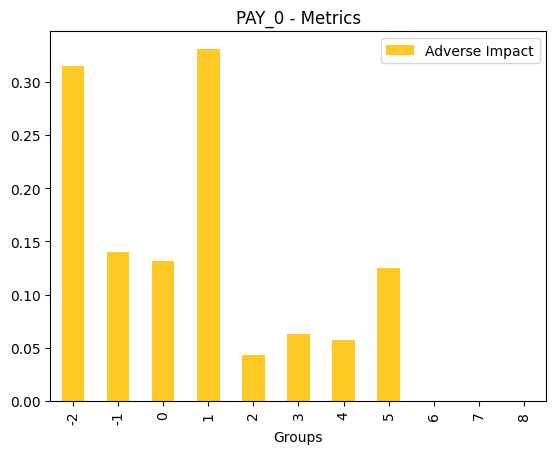

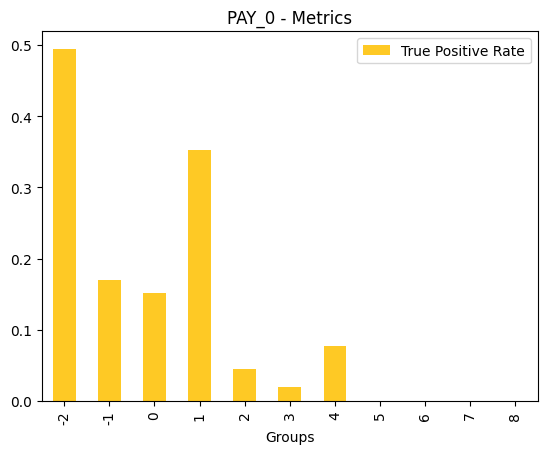

[]

In [18]:
# Only plot metrics for "N", "Adverse Impact" and "True Positive Rate"
result.plot(feature_name="PAY_0", metrics_of_interest=["N", "Adverse Impact", "True Positive Rate"])

### Save the explainer log and data

In [19]:
# save the explainer log
result.log(path="./dia-demo.log")

In [20]:
!head dia-demo.log

In [21]:
# save the explainer data
result.zip(file_path="./dia-demo-archive.zip")

In [22]:
!unzip -l dia-demo-archive.zip

Archive:  dia-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     3890  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a4d5-4d1a-8e2d-492d577e4096/result_descriptor.json
      117  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a4d5-4d1a-8e2d-492d577e4096/global_disparate_impact_analysis/text_plain.meta
       19  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a4d5-4d1a-8e2d-492d577e4096/global_disparate_impact_analysis/text_plain/explanation.txt
     4078  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a4d5-4d1a-8e2d-492d577e4096/work/dia_entity.json
     2248  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a4d5-4d1a-8e2d-492d577e4096/work/PAY_3/metrics.jay
      304  2023-03-12 23:07   explainer_h2o_sonar_explainers_dia_explainer_DiaExplainer_1d88b336-a